In [1]:
from __future__ import unicode_literals
from textblob import TextBlob
import pandas as pd

In [2]:
!pwd

/Users/luis/Desktop/master_codes/tfm


In [18]:
wine = pd.read_csv('/Users/luis/Desktop/master_codes/tfm/winemag-data_first150k.csv.zip',sep=",")
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [19]:
wine.columns

Index([u'Unnamed: 0', u'country', u'description', u'designation', u'points',
       u'price', u'province', u'region_1', u'region_2', u'variety', u'winery'],
      dtype='object')

In [22]:
wine = wine.drop('Unnamed: 0',1)

In [25]:
wine = wine.drop_duplicates()

In [26]:
len(wine)

97851

In [27]:
# keeping only varieties with at least 20 reviews
num_reviews = wine.groupby('variety').description.count().to_frame().reset_index()
num_reviews = num_reviews[num_reviews.description > 19]
frequent_varieties = num_reviews.variety.tolist()
wine_f = wine.loc[wine['variety'].isin(frequent_varieties)]

In [28]:
len(wine_f)

95778

# Ranking wine varieties by sweetness from descriptions

In [29]:
# we will do this by counting the frequency of words associated with sweetness 
# in the descriptions of each variety (the words will be "sweet","sweetness","sugar","sugary",
#"caramel", and "caramelized")

In [30]:
# first we must clean the text by removing punctuation symbols and setting all words 
# to lowercase letters
import string 

def remove_punctuation(review):
    pepe = review.translate(None, string.punctuation)
    return pepe

# removing punctuation from descriptions
wine['description'] = wine['description'].apply(remove_punctuation)
# converting to lowercase letters
wine['description'] = wine['description'].str.lower()

In [34]:
# a function to locate the maximum element of a list
import numpy as np
def locate_max(list):
    biggest = np.max(list)
    return biggest, [index for index, element in enumerate(list) 
                      if biggest == element]

In [35]:
#example, calculate the frequency of sweetness-words in descriptions of Port wine
porto = wine[wine.variety == "Port"]

sweet_freq = []
for review in porto.description:
    review = TextBlob(review.decode('unicode-escape'))
    num_sweet = review.words.count("sweet")
    num_sweetness = review.words.count("sweetness")
    num_sugar = review.words.count("sugar")
    num_sugary = review.words.count("sugary")
    num_caramel = review.words.count("caramel")
    num_caramelized = review.words.count("caramelized")
    total_sweet = num_sweet+num_sweetness+num_sugar+num_sugary+num_caramel+num_caramelized
    sweet_freq.append(total_sweet)

print(float(sum(sweet_freq))/len(sweet_freq))

0.555869872702


In [36]:
locate_max(sweet_freq)

(4, [140])

In [37]:
porto.description.iloc[140]

'this 100 petite sirah is very very sweet when the palate experiences this much concentrated brown sugar and caramel it exults the problem is that sweetness is pretty much all there is youll find blackberry jam and chocolate'

In [46]:
#writing it as a function that assigns a sweetness-score based on a list of descriptions
def sweetness_score(descriptions):
    sweet_freq = []
    for review in descriptions:
        review = TextBlob(review.decode('unicode-escape'))
        num_sweet = review.words.count("sweet")
        num_sweetness = review.words.count("sweetness")
        num_sugar = review.words.count("sugar")
        num_sugary = review.words.count("sugary")
        num_caramel = review.words.count("caramel")
        num_caramelized = review.words.count("caramelized")
        total_sweet = num_sweet+num_sweetness+num_sugar+num_sugary+num_caramel+num_caramelized
        sweet_freq.append(total_sweet)
    return float(sum(sweet_freq))/len(sweet_freq)

In [47]:
sweetness_score(porto.description)

0.5558698727015559

In [48]:
#calculating the frequency of "sweetness-related" words for each variety of wine and saving 
#it in a list tuples of type (wine-variety,frequency)

sweet_list = []
for variety in wine_f.variety.unique():
    df_variety = wine_f[wine_f.variety == variety]
    sweet = sweetness_score(df_variety.description)
    sweet_list.append((variety,sweet))

# sorting from high sweeetness to low sweetness    
sorted_sweet_list = sorted(sweet_list, key=lambda x: -x[1])

In [49]:
# putting the list in dataframe format
df_sweetness = pd.DataFrame(sorted_sweet_list,columns=["variety","sweetness_score"])

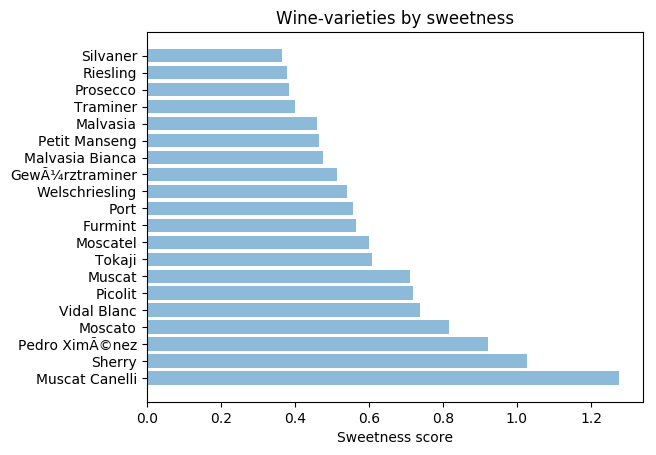

In [50]:
# Barplot of the data
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

varieties = tuple(df_sweetness.variety.tolist())[:20]
varieties = [TextBlob(i.decode('unicode-escape')) for i in varieties]
y_pos = np.arange(len(varieties))
performance = np.array(df_sweetness.sweetness_score)[:20]
error = np.random.rand(len(varieties))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, varieties)
plt.xlabel('Sweetness score')
plt.title('Wine-varieties by sweetness')
 
plt.show()

# Ranking wine varieties by acidity from descriptions

In [53]:
def acidity_score(descriptions):
    acid_freq = []
    for review in descriptions:
        review = TextBlob(review.decode('unicode-escape'))
        num_acid = review.words.count("acid")
        num_acidity = review.words.count("acidity")
        num_acidic = review.words.count("acidic")
        num_sour = review.words.count("sour")
        total_acid = num_acid+num_acidity+num_acidic+num_sour
        acid_freq.append(total_acid)
    return float(sum(acid_freq))/len(acid_freq)

In [54]:
acidity_score(porto.description)

0.38189533239038187

In [55]:
#calculating the frequency of "sweetness-related" words for each variety of wine and saving 
#it in a list tuples of type (wine-variety,frequency)

acid_list = []
for variety in wine_f.variety.unique():
    df_variety = wine_f[wine_f.variety == variety]
    acid = acidity_score(df_variety.description)
    acid_list.append((variety,acid))

# sorting from high sweeetness to low sweetness    
sorted_acid_list = sorted(acid_list, key=lambda x: -x[1])

In [59]:
# putting the list in dataframe format
df_acidity = pd.DataFrame(sorted_acid_list,columns=["variety","acidity_score"])

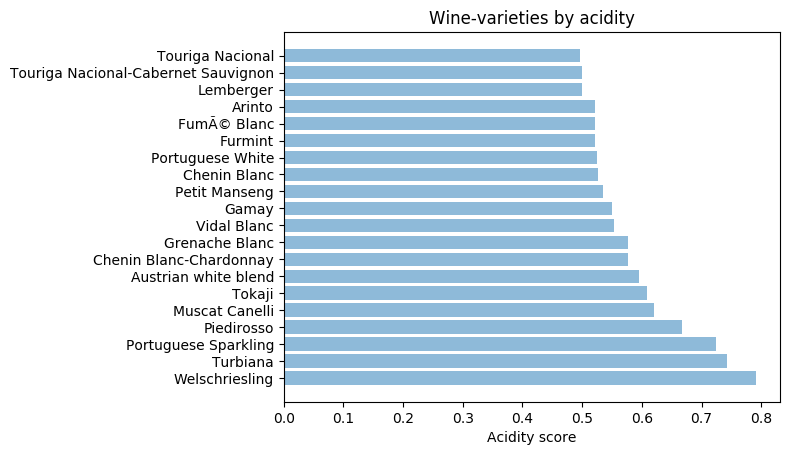

In [60]:
plt.rcdefaults()
fig, ax = plt.subplots()

varieties = tuple(df_acidity.variety.tolist())[:20]
varieties = [TextBlob(i.decode('unicode-escape')) for i in varieties]
y_pos = np.arange(len(varieties))
performance = np.array(df_acidity.acidity_score)[:20]
error = np.random.rand(len(varieties))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, varieties)
plt.xlabel('Acidity score')
plt.title('Wine-varieties by acidity')
 
plt.show()

In [61]:
df_acidity.head(7)

,variety,acidity_score
0,Welschriesling,0.791667
1,Turbiana,0.742424
2,Portuguese Sparkling,0.724138
3,Piedirosso,0.666667
4,Muscat Canelli,0.620690
5,Tokaji,0.608696
6,Austrian white blend,0.594595


# # Ranking wine varieties by tannin from descriptions

In [62]:
def tannin_score(descriptions):
    tannin_freq = []
    for review in descriptions:
        review = TextBlob(review.decode('unicode-escape'))
        num_tannin = review.words.count("tannin")
        num_tannic = review.words.count("tannic")
        total_tannin = num_tannin+num_tannic
        tannin_freq.append(total_tannin)
    return float(sum(tannin_freq))/len(tannin_freq)

In [63]:
tannin_score(porto.description)

0.07496463932107496

In [64]:
#calculating the frequency of "sweetness-related" words for each variety of wine and saving 
#it in a list tuples of type (wine-variety,frequency)
tannin_list = []
for variety in wine_f.variety.unique():
    df_variety = wine_f[wine_f.variety == variety]
    tannin = tannin_score(df_variety.description)
    tannin_list.append((variety,tannin))

# sorting from high sweeetness to low sweetness    
sorted_tannin_list = sorted(tannin_list, key=lambda x: -x[1])

In [65]:
sorted_tannin_list[:10]

[('Claret', 0.38095238095238093),
 ('Tinta de Toro', 0.36879432624113473),
 ('Touriga Nacional-Cabernet Sauvignon', 0.35),
 ('Petite Verdot', 0.32432432432432434),
 ('Tannat-Cabernet', 0.2857142857142857),
 ('Tannat', 0.26136363636363635),
 ('Charbono', 0.25),
 ('Tinto del Pais', 0.22807017543859648),
 ('Petite Sirah', 0.20034246575342465),
 ('Tinto Fino', 0.19230769230769232)]

In [66]:
# putting the list in dataframe format
df_tannin = pd.DataFrame(sorted_tannin_list,columns=["variety","tannin_score"])

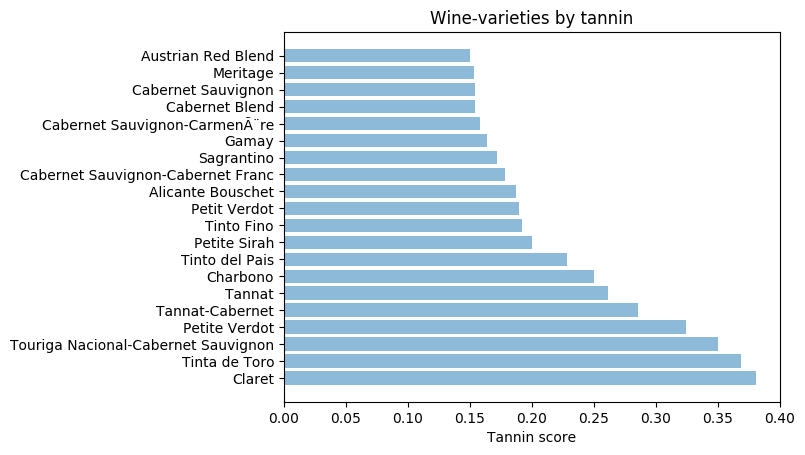

In [67]:
plt.rcdefaults()
fig, ax = plt.subplots()

varieties = tuple(df_tannin.variety.tolist())[:20]
varieties = [TextBlob(i.decode('unicode-escape')) for i in varieties]
y_pos = np.arange(len(varieties))
performance = np.array(df_tannin.tannin_score)[:20]
error = np.random.rand(len(varieties))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, varieties)
plt.xlabel('Tannin score')
plt.title('Wine-varieties by tannin')
 
plt.show()

# Classifying wine varieties by grape color

In [74]:
# we will keep only varieties containing at least 10 descriptions
num_reviews = wine.groupby('variety').description.count().to_frame().reset_index()
num_reviews = num_reviews[num_reviews.description > 9]
frequent_varieties = num_reviews.variety.tolist()
wine_ff = wine.loc[wine['variety'].isin(frequent_varieties)]

In [75]:
#writing it as a function that assigns a redness-score based on a list of descriptions
def redness_score(descriptions):
    red_freq = []
    for review in descriptions:
        review = TextBlob(review.decode('unicode-escape'))
        n1 = review.words.count("cherry")
        n2 = review.words.count("berry")
        n3 = review.words.count("cherries")
        n4 = review.words.count("berries")
        n5 = review.words.count("red")
        n6 = review.words.count("raspberry")
        n7 = review.words.count("raspberries")
        n8 = review.words.count("blueberry")
        n9 = review.words.count("blueberries")
        n10 = review.words.count("blackberry")
        n11 = review.words.count("blackberries")
        total_red = n1+n2+n3+n4+n5+n6+n7+n8+n9+n10+n11
        red_freq.append(total_red)
    return float(sum(red_freq))/len(red_freq)

In [76]:
#writing it as a function that assigns a redness-score based on a list of descriptions
def whiteness_score(descriptions):
    white_freq = []
    for review in descriptions:
        review = TextBlob(review.decode('unicode-escape'))
        n1 = review.words.count("lemon")
        n2 = review.words.count("lemons")
        n3 = review.words.count("lime")
        n4 = review.words.count("limes")
        n5 = review.words.count("peach")
        n6 = review.words.count("peaches")
        n7 = review.words.count("white")
        n8 = review.words.count("apricot")
        n9 = review.words.count("pear")
        n10 = review.words.count("apple")
        n11 = review.words.count("nectarine")
        n12 = review.words.count("orange")
        n13 = review.words.count("pineapple")
        total_white = n1+n2+n3+n4+n5+n6+n7+n8+n9+n10+n11+n12+n13
        white_freq.append(total_white)
    return float(sum(white_freq))/len(white_freq)

In [77]:
red_types = []
for variety in wine_ff.variety.unique():
    df_variety = wine_ff[wine_ff.variety == variety]
    red = redness_score(df_variety.description)
    red_types.append((variety,red)) # a redness score is asigned to each variety

In [78]:
# putting it in dataframe format
color_classification =  pd.DataFrame.from_records(red_types,columns=["variety","redness_score"])

In [79]:
white_types = []
for variety in wine_ff.variety.unique():
    df_variety = wine_ff[wine_ff.variety == variety]
    white = whiteness_score(df_variety.description)
    white_types.append((variety,white)) # a whiteness score is asigned to each variety

In [80]:
white = pd.DataFrame.from_records(white_types,columns=["variety","whiteness_score"])

In [81]:
# merging the two dataframes, we have a dataframe which, for each variety provides a redness and whiteness score
color_classification = color_classification.merge(white,how='left',on='variety')

In [82]:
color_classification.sample(5)

,variety,redness_score,whiteness_score
235,Muscat Blanc,0.000000,1.300000
221,Sangiovese Grosso,1.133333,0.080460
134,Rosado,0.809524,0.523810
72,Lemberger,1.583333,0.125000
162,Arneis,0.000000,1.394737


In [ ]:
# a function that compares the redness and whiteness score for each variety,
# and returns "red" if redness score is greater, "white" if whiteness score
# is greater, or "inconclusive" otherwise
def identify_color(redness,whiteness):
    if redness > whiteness:
        return "red"
    if redness < whiteness:
        return "white"
    else:
        return "inconclusive"

In [ ]:
color_classification['color'] = np.vectorize(identify_color)(color_classification['redness_score'], color_classification['whiteness_score'])

In [ ]:
color_classification.sample(9)

In [ ]:
color_classification.color.value_counts()

In [ ]:
reds = color_classification[color_classification.color == "red"]

In [ ]:
reds["color_p"] = reds.redness_score-reds.whiteness_score

In [ ]:
#checking dubious cases of red wines
reds.sort_values(by='color_p').head()

In [ ]:
whites = color_classification[color_classification.color == "white"]

In [ ]:
whites["color_p"] = whites.whiteness_score-whites.redness_score

In [ ]:
#checking the more dubious cases of white wines
whites.sort_values(by='color_p').head()

In [ ]:
# including color column in descriptions dataframe by merging
wine_f = wine_f.merge(color_classification,how='left',on="variety")

In [ ]:
wine_f.sample(2)